# How to: Custom Check

It is possible to extend deepchecks by implementing custom check. This is desirable when you want to have your own logic of metrics or validation, or even just to display your own graph using deepchecks' suite.

This guide will walk you through creating a check with your own logic.
Each check consists of 3 main parts: return value (mandatory), display and conditions. we will implement here the return value and display, for conditions see [link how to create conditions]

## Basic Check

Let's implement a check that will compare the test and train datasets sizes.
The first step is to create check class, which inherits from a base check class. each base check is differed by it's run method signature or by the purpose it fulfills [link to all]. in this case we will use `TrainTestBaseCheck`, which used to compare between test and train datasets. After creating the basic class with the `run` function we will write our check logic inside it.

*Good to know: the return value of a check can be any object, a number, dictionary, string, etc...*

In [1]:
from deepchecks import TrainTestBaseCheck, CheckResult, Dataset


class DatasetSizeComparison(TrainTestBaseCheck):
    """Check which compares the sizes of train and test datasets."""
    
    def run(self, train_dataset: Dataset, test_dataset: Dataset, model=None) -> CheckResult:
        ## Check logic
        train_size = train_dataset.n_samples
        test_size = test_dataset.n_samples
        
        ## Return value as check result
        return_value = {'train_size': train_size, 'test_size': test_size}
        return CheckResult(return_value)

Hooray! we just wrote our custom check. now let's create 2 datasets and try to run it

In [2]:
import pandas as pd

# TODO which data to load
train_dataset = Dataset(pd.DataFrame(data={'x': [1,2,3,4,5,6,7,8,9]}))
test_dataset = Dataset(pd.DataFrame(data={'x': [1,2,3]}))

DatasetSizeComparison().run(train_dataset, test_dataset)

Dataset Size Comparison

Check which compares the sizes of train and test datasets.

✓ Nothing found

Our check run successfully but we got the print "Nothing found". this is because we haven't defined to the check anything to display, so the default behavior is to print "Nothing found". in order to access the value we defined earlier we can use the "value" property on the result.

In [3]:
result = DatasetSizeComparison().run(train_dataset, test_dataset)
result.value

{'train_size': 9, 'test_size': 3}

## Check Display

Most of the times we will want our checks to have a visual display that will quickly summarize the check result. we can pass to the `CheckResult` objects to be displayed like html, dataframe or graph. so let's define a graph that will be displayed using `matplotlib`. in order to use `matplotlib` we have to implement the code inside a function and not call it directly in the check, this is due to architecture limitations of `matplotlib` (read more here...)

*Good to know: `display` can receive a single object to display or a list of objects*

In [4]:
from deepchecks import TrainTestBaseCheck, CheckResult, Dataset
import matplotlib.pyplot as plt

class DatasetSizeComparison(TrainTestBaseCheck):
    """Check which compares the sizes of train and test datasets."""
    
    def run(self, train_dataset: Dataset, test_dataset: Dataset, model=None) -> CheckResult:
        ## Check logic
        train_size = train_dataset.n_samples
        test_size = test_dataset.n_samples
        
        ## Create the check result value
        sizes = {'Train': train_size, 'Test': test_size}
        
        ## Display function of matplotlib graph:
        def graph_display():
            plt.bar(sizes.keys(), sizes.values(), color='green')
            plt.xlabel("Dataset")
            plt.ylabel("Size")
            plt.title("Datasets size comparison")
        
        return CheckResult(sizes, display=graph_display)

Let check it out:

Dataset Size Comparison

Check which compares the sizes of train and test datasets.

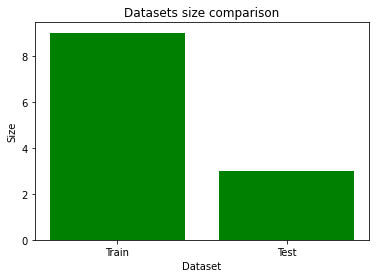

In [5]:
DatasetSizeComparison().run(train_dataset, test_dataset)

Voila! now we have a check that prints a graph and have a value. we can add this check to any suite and it will run with it.  
The next possible step is to implement condition, which will allow us to give a check result a score of pass / not pass. to do it check out the following guide [link]